In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker

import re
import os
import string
import operator
from itertools import islice
from collections import Counter

from datetime import date
import matplotlib.dates as dates

from nltk import ngrams
import nltk as nltk
from nltk.corpus import stopwords

In [135]:
sns.set_style('darkgrid')
sns.set_context('paper')
pd.set_option('display.max_colwidth', None)

In [111]:
punct_signs = list(string.punctuation)
punct_signs.append('…')
punct_signs.append('¿')
punct_signs.append('•')
punct_signs.append('”')
punct_signs.append('“')
punct_signs.append('–')
punct_signs.remove('&')
punct_signs.append('∑')



In [112]:
df = pd.read_csv('transform_data.cv')
df.columns

Index(['id', 'type', 'text', 'created'], dtype='object')

In [113]:
df.head(1)

,id,type,text,created
0,fj83m8c,comment,"The report (PDF) https://www.who.int/docs/default-source/coronaviruse/who-china-joint-mission-on-covid-19-final-report.pdf\n\nWuhan - yeah, it's still in lockdown. My take is that they need intensive care to make patients alive and recover, and they need more facilities to keep motility low. WHO advisor on press conference was saying that what China is doing while the lockdown is going on is to build more hospitals and containment facilities. Welp.",2020-03-01 18:13:23


In [114]:
import math
def clean_text(text):
    for p in punct_signs:
        text = text.replace(p, ' ')
    clean_text = text.lower().split()
    clean_text = [w for w in clean_text if w not in stop_words]
    return clean_text

#df['lexical_diversity'] = len(set(df.['text']))/len(df['text']) * 100
df['word_count'] = [len(x.split()) for x in df['text'].tolist()]
df['unique_wordc'] = [len(set(x.split())) for x in df['text'].tolist()]
df

df.columns

Index(['id', 'type', 'text', 'created', 'word_count', 'unique_wordc'], dtype='object')

In [136]:
df = pd.read_csv('transform_data.cv')
df['unique_wordc'] = [len(set(x.split())) for x in df['text'].tolist()]
df.created = pd.to_datetime(df.created, format='%Y-%m-%d %H:%M:%S')
df.set_index('created', inplace=True)

plt.figure(figsize=(14,8))
ax = df[df['type'] == 'submission']['unique_wordc'].plot()
ax = df[df['type'] == 'comment']['unique_wordc'].plot()
ticklabels = df.index.strftime('%Y-%m-%d')

plt.show()

In [116]:
df.created = pd.to_datetime(df.created, format='%Y-%m-%d %H:%M:%S')
df.set_index('created', inplace=True)

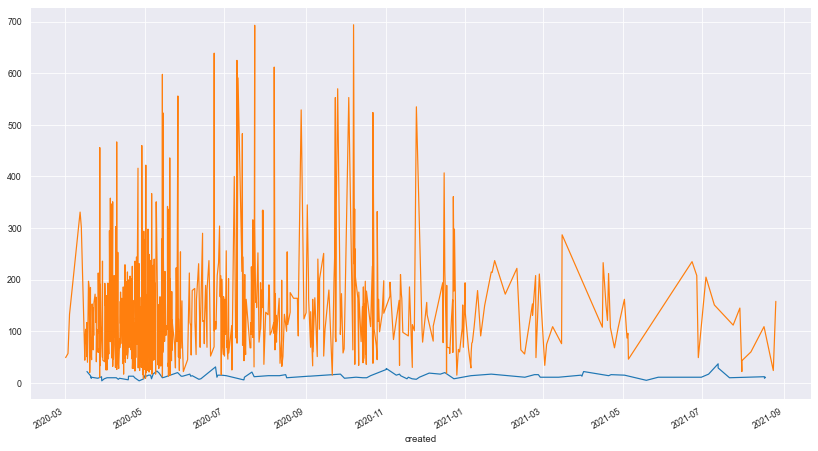

In [119]:
plt.figure(figsize=(14,8))
ax = df[df['type'] == 'submission']['unique_wordc'].plot()
ax = df[df['type'] == 'comment']['unique_wordc'].plot()
ticklabels = df.index.strftime('%Y-%m-%d')
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

## 50 most frequently used ngrams in all documents

In [126]:
#m is the number of top ngrams.
def getNGrams(text, n, m):
    h_dict = {}   
    ngramas = list(ngrams(text, n))
    for grams in ngramas:
        words = ' '.join(grams).strip()
        if words not in h_dict:
            h_dict[words] = 0
        h_dict[words] = h_dict[words] + 1
        
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    top_values = list(islice(sorted_dict, m))
    return [(r[0], r[1], round(r[1]/len(ngramas)*100,2)) for r in top_values]

def printNgrams(data, m):
    Ngrams = []
    unigrams = getNGrams(data, 1, m)
    bigrams = getNGrams(data, 2 , m)
    trigrams = getNGrams(data, 3 , m)
    for i in range(0,m):
        Ngrams.append(unigrams[i] + bigrams[i] + trigrams[i])
    df = pd.DataFrame(Ngrams, columns=['Unigrams', 'Absolute Freq', 'Relative Freq', 
                                       'Bigrams', 'Absolute Freq', 'Relative Freq', 
                                       'Trigrams', 'Absolute Freq', 'Relative Freq',]) 
    return df

In [127]:
data = ' '.join(df['text'])
data  = clean_text(data)

In [128]:
stop_words = stopwords.words('english') + ['also', 'could','&gt', '2', '1', 'https', '0', 'www', 'b' ]
dfNgrams = printNgrams(data, 50)
dfNgrams

,Unigrams,Absolute Freq,Relative Freq,Bigrams,Absolute Freq,Relative Freq,Trigrams,Absolute Freq,Relative Freq
0,covid,1684,1.60,covid 19,1004,0.95,covid 19 pandemic,73,0.07
1,lockdown,1409,1.34,sars cov,259,0.25,covid 19 deaths,52,0.05
2,19,1047,0.99,herd immunity,133,0.13,covid 19 lockdown,51,0.05
3,people,811,0.77,social distancing,125,0.12,covid 19 cases,40,0.04
4,deaths,689,0.65,95 ci,94,0.09,sars cov infection,36,0.03
5,cases,457,0.43,public health,92,0.09,covid 19 epidemic,28,0.03
6,would,426,0.40,excess deaths,89,0.08,thelancet com journals,24,0.02
7,virus,364,0.34,19 pandemic,73,0.07,social distancing measures,22,0.02
8,health,363,0.34,long term,68,0.06,covid 19 patients,21,0.02
9,one,347,0.33,lockdown measures,66,0.06,ncbi nlm nih,20,0.02


## 30 Most used verbs, nouns and adjectives in all courses

In [129]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet');

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dvaro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dvaro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dvaro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [130]:
#m is the number of top ngrams.
def getNPartsOfSpeech(text, m, tag):
    h_dict = {}   
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    #lemmatization and filtering allowed tags
    filtered_tags = [wordnet_lemmatizer.lemmatize(pt[0], pos="v") for pt in pos_tags if pt[1].startswith(tag)]
    
    for ft in filtered_tags:    
        if ft not in h_dict:
            h_dict[ft] = 0
        h_dict[ft] += 1
        
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    top_values = list(islice(sorted_dict, m))
    return [(r[0], r[1], round(r[1]/len(filtered_tags)*100,2)) for r in top_values]

def printNPOS(data, m):
    postags = []
    
    verbs = getNPartsOfSpeech(data, m, 'V')
    verbs += [(None, None)] * (m - len(verbs))
    
    adjs = getNPartsOfSpeech(data, m , 'J')
    adjs +=[(None, None)] * (m - len(adjs))
    
    nouns = getNPartsOfSpeech(data, m , 'N')
    nouns +=[(None, None)] * (m - len(nouns))
    
    for i in range(0,m):
        if all(verbs[i]) or all(adj[i]) or all(nouns[i]):
            postags.append(verbs[i] + adjs[i] + nouns[i])
    df = pd.DataFrame(postags, columns=['Verbs', 'Absolute Freq', 'Relative Freq', 
                                       'Adjectives', 'Absolute Freq', 'Relative Freq',
                                        'Nouns', 'Absolute Freq', 'Relative Freq' ]) 
    return df

In [ ]:
stop_words = stopwords.words('english') + ['also', 'could','&gt', '2', '1', 'https', '0', 'www', 'b', '*', ']' ]

In [132]:
data = ' '.join(df['text'])

In [133]:
printNPOS(data, 30)

,Verbs,Absolute Freq,Relative Freq,Adjectives,Absolute Freq,Relative Freq,Nouns,Absolute Freq,Relative Freq
0,be,7132,23.46,lockdown,455,2.32,%,1265,2.41
1,have,1970,6.48,other,393,2.01,*,881,1.68
2,do,996,3.28,*,358,1.83,gt,803,1.53
3,'s,560,1.84,more,265,1.35,people,778,1.48
4,get,417,1.37,many,231,1.18,deaths,657,1.25
5,go,381,1.25,social,223,1.14,lockdown,626,1.19
6,think,300,0.99,due,197,1.01,case,587,1.12
7,see,285,0.94,excess,179,0.91,COVID-19,531,1.01
8,take,282,0.93,positive,170,0.87,number,422,0.80
9,make,280,0.92,first,157,0.80,https,397,0.75
